,t-3,t-2,t-1,t,labels,diff t t-1,diff t t-2,diff t t-3
3,50.000000,49.924882,49.933607,49.935351,0.0,0.001743,0.010469,-0.064649
4,49.924882,49.933607,49.935351,49.991193,0.0,0.055842,0.057586,0.066311
5,49.933607,49.935351,49.991193,50.150267,0.0,0.159074,0.214916,0.216660
6,49.935351,49.991193,50.150267,50.270784,0.0,0.120517,0.279591,0.335433
7,49.991193,50.150267,50.270784,50.305194,0.0,0.034410,0.154927,0.314001


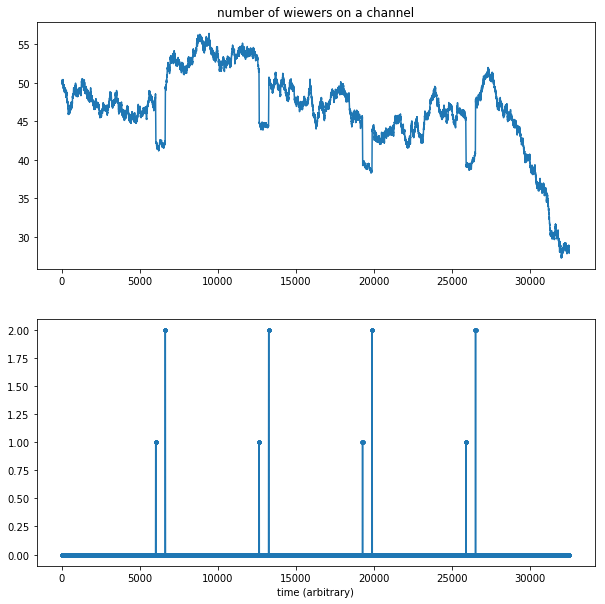

In [9]:
#################################################
#created the 19/04/2018 12:57 by Alexis Blanchet#
#################################################

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
from pandas import DataFrame
from pandas import concat
import random
import os


def load_timeserie(file):
    data_file = open(file, 'r',os.O_NONBLOCK)
    data_file = data_file.read()
    datas = data_file.split('\n')
    data = [float(x) for x in datas[:-1]]
    return data
    
ts = load_timeserie('/home/alexis/Bureau/Stage/Time-series/fake-time-series.txt')
labels = load_timeserie('/home/alexis/Bureau/Stage/Time-series/fake-time-series-labels.txt')

plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(ts, '-')
plt.title('number of wiewers on a channel')

plt.subplot(2, 1, 2)
plt.plot(labels, '.-')
plt.xlabel('time (arbitrary)')


data = pd.DataFrame(ts,columns=['values'])
data['labels'] = labels
temps = DataFrame(data['values'].values)
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't']
temps = DataFrame(data['values'].values)
dataframe = dataframe.drop(dataframe.index[[0,1,2]])
dataframe['labels'] = labels[3:]
dataframe["diff t t-1"]=dataframe["t"]-dataframe["t-1"]
dataframe["diff t t-2"]=dataframe["t"]-dataframe["t-2"]
dataframe["diff t t-3"]=dataframe["t"]-dataframe["t-3"]

dataframe.head()

In [16]:
x = dataframe["diff t t-1"]
x1 = dataframe.loc[dataframe['labels'] == 0]["diff t t-1"]

In [28]:
import scipy.stats

m = np.mean(x1)
sd = sum([(y-m)**2 for y in x1])/(len(x1)-1)
print("moyenne: %s   standard deviation: %s" %(str(m),str(sd)))
m2 = np.mean(x)
sd2 = sum([(y-m2)**2 for y in x1])/(len(x)-1)
print("moyenne: %s   standard deviation: %s" %(str(m2),str(sd2)))

d1 = scipy.stats.norm(m, 100)
d2 = scipy.stats.norm(m2, 100)

moyenne: -0.000696477463955173   standard deviation: 0.007662740649306383
moyenne: -0.0006772989789976568   standard deviation: 0.007636334032703751


In [29]:
prob = [ d2.pdf(y) for y in x]
dist = [ d2.cdf(y) for y in x]

Text(0.5,0,'time (arbitrary)')

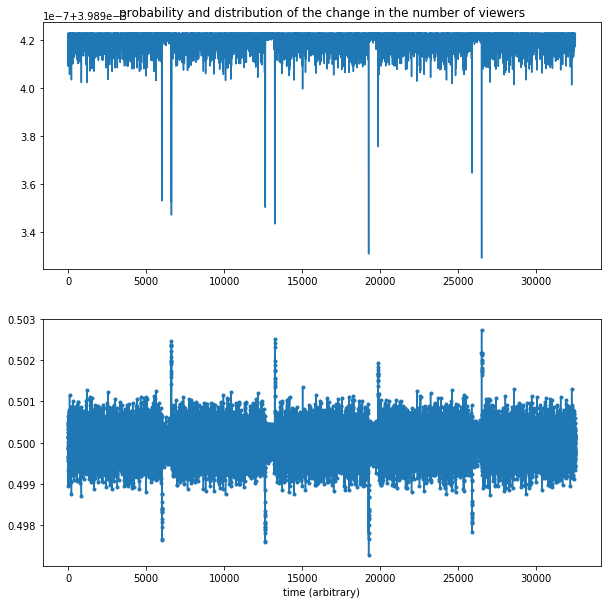

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(prob, '-')
plt.title('probability and distribution of the change in the number of viewers')

plt.subplot(2, 1, 2)
plt.plot(dist, '.-')
plt.xlabel('time (arbitrary)')